In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

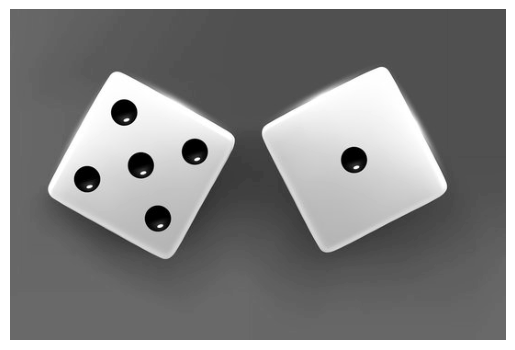

In [5]:
image = cv2.imread("input\dice3.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

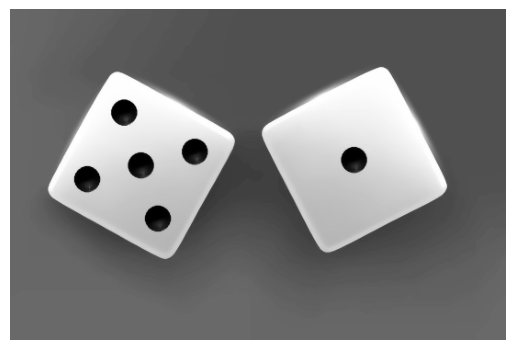

In [6]:
image_blur = cv2.medianBlur(image, 7)
plt.imshow(image_blur, cmap='gray')
plt.axis('off')
plt.show()

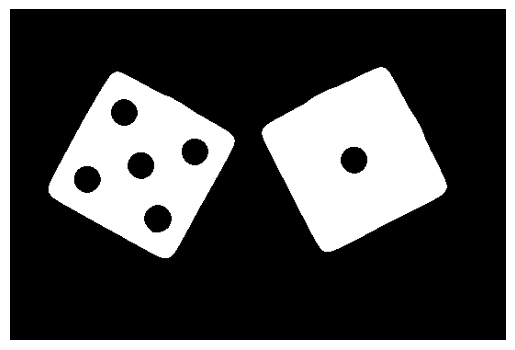

In [7]:
_, threshold = cv2.threshold(image_blur, 180, 255, cv2.THRESH_BINARY)
plt.imshow(threshold, cmap='gray')
plt.axis('off')
plt.show()

[5, 1]


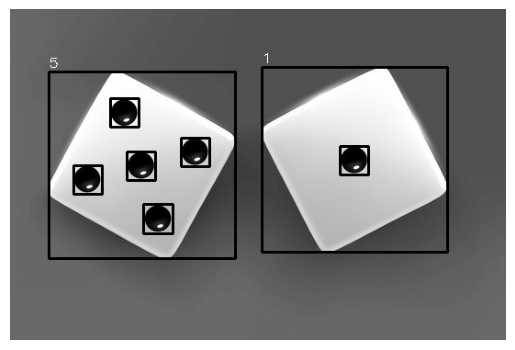

In [9]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
result = image.copy()
hierarchy_index = []
output = []
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if 5 < w < result.shape[0]/1.5 and 5 < h < result.shape[1]/1.5:
        cv2.rectangle(result, (x,y), (x+w, y+h), (0, 0, 255), 2)
        hierarchy_index.append(i)
        # print(f'{i}, w: {w} , h: {h} , {hierarchy[0][i]}')
        if hierarchy[0][i][3] == -1:
            score = 0
            child = hierarchy[0][i][2]
            while child != -1 and score < 6:
                score += 1
                child = hierarchy[0][child][0]
            cv2.putText(result, f'{score}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), thickness= 1)
            output.append(score)

print(output)
cv2.imwrite(f'output/dice_number.png', result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
